In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\Coding Stuff\FSDS\Internship\Insurance Premium Prediction\notebooks\data\insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.duplicated().sum()

1

In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
data["sex"].value_counts()


sex
male      675
female    662
Name: count, dtype: int64

In [12]:
data["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [13]:
data["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

Convert columns from string ["sex","smoker","region"] to numerical 

In [14]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [15]:
data['sex'] = data["sex"].map({'female':0,'male':1})

In [16]:
data['smoker'] = data["smoker"].map({'no':0,'yes':1})

In [17]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
data["region"] = data["region"].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


Store features matrix in X and response(target) in vector Y

In [21]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

Import the dependenecies

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

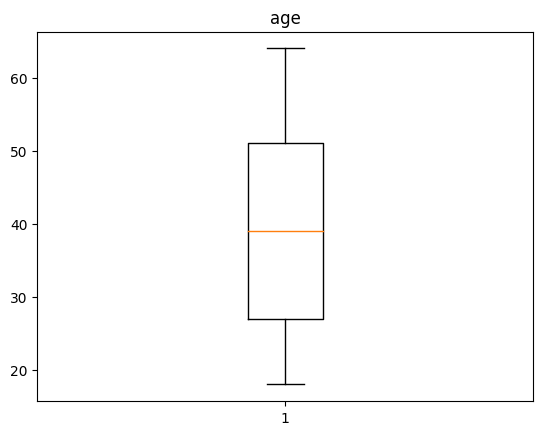

<Figure size 200x200 with 0 Axes>

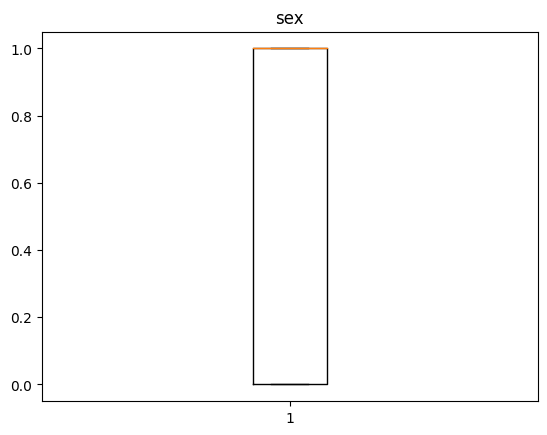

<Figure size 200x200 with 0 Axes>

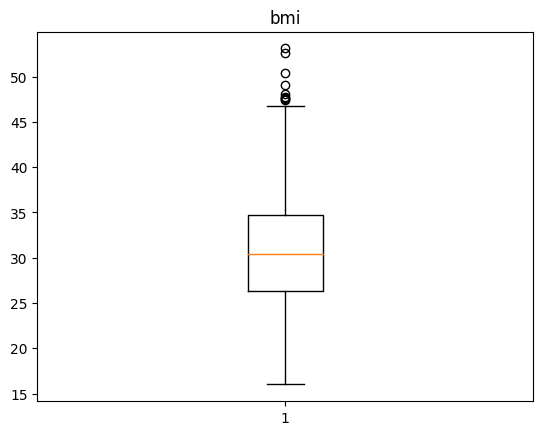

<Figure size 200x200 with 0 Axes>

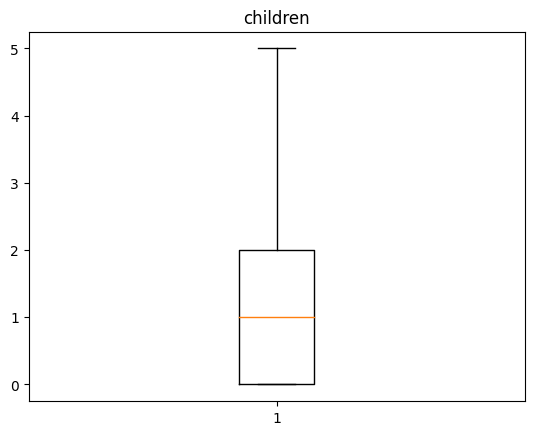

<Figure size 200x200 with 0 Axes>

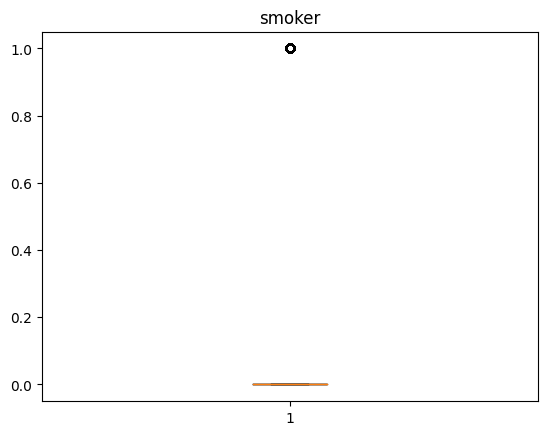

<Figure size 200x200 with 0 Axes>

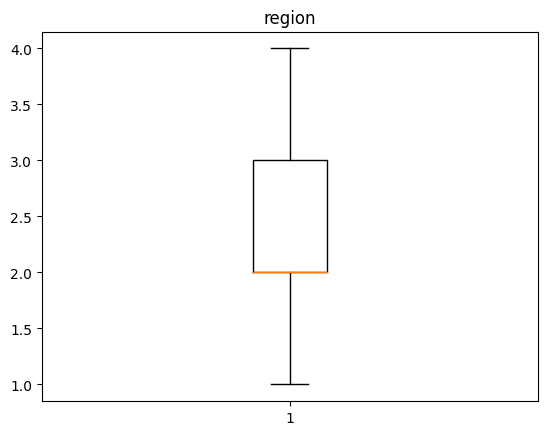

<Figure size 200x200 with 0 Axes>

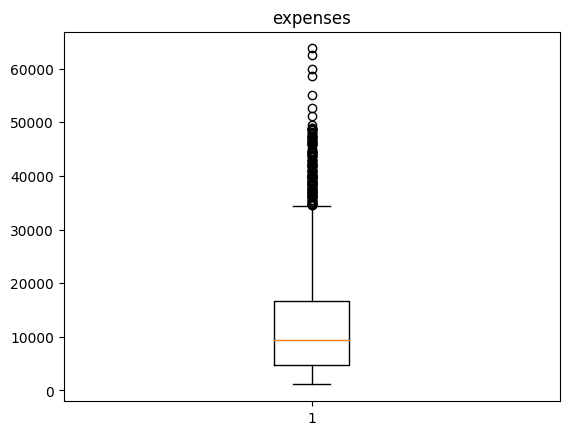

<Figure size 200x200 with 0 Axes>

In [23]:
for col in data.columns:
    plt.boxplot(data[col])
    plt.title(col)
    plt.figure(figsize=(2,2))
    plt.show()

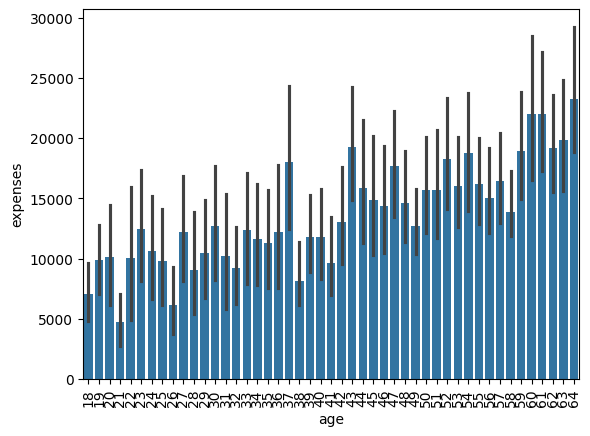

In [24]:
sns.barplot(x=data['age'], y=data['expenses'],fill=True)
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

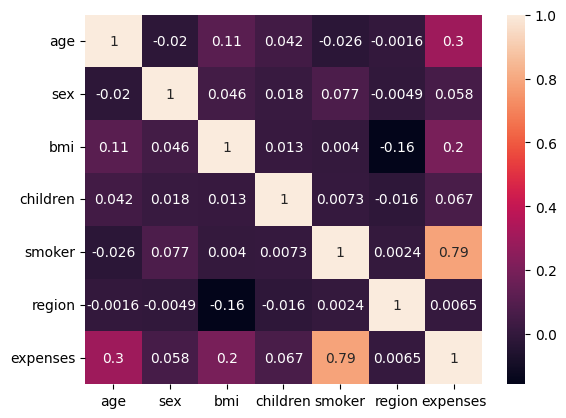

In [25]:
data.corr(numeric_only=True)['expenses']
sns.heatmap(data.corr(),annot=True)

### Train test split

1. Split data into two part : a training set and a testing set
1. Train the model(s) on training set
1. Test the model(s) on testing set

In [26]:
# separating independent variables and dependent(target) variable

X = data.drop(["expenses"],axis=1)

In [27]:
y = data['expenses']

In [28]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [29]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [32]:
x_train.shape

(1069, 6)

In [33]:
x_test.shape

(268, 6)

Linear Regression

In [34]:
step1 = StandardScaler() 
step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.8068280291899952
MAE score  4182.597271311558


Ridge Regression

In [35]:
step1 = StandardScaler() 
step2 = Ridge()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.8066445253479999
MAE score  4184.996515937212


Lasso Regresssion

In [36]:
step1 = StandardScaler() 
step2 = Lasso()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.8067926267013723
MAE score  4182.709163254238


KNN

In [37]:
step1 = StandardScaler() 

regressor = KNeighborsRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('regressor', regressor)
])

# Define the hyperparameter grid
param_grid = {
    "regressor__n_neighbors":[1,3,5,7,9,11,15,25,35,75,101],
    "regressor__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=True, refit=True)
grid_search.fit(x_train, y_train)


print(grid_search.best_params_)

# summarize best
print('Best R2: %.3f'  % grid_search.best_score_)
print('Best Config: %s' % grid_search.best_params_)

y_pred = grid_search.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 44 candidates, totalling 220 fits


{'regressor__algorithm': 'brute', 'regressor__n_neighbors': 11}
Best R2: 0.791
Best Config: {'regressor__algorithm': 'brute', 'regressor__n_neighbors': 11}
R2 score  0.8558845995896144
MAE score  3242.320736092266


SVR

In [38]:
step1 = StandardScaler() 
step2 = SVR()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  -0.12988598630302195
MAE score  9252.815741701743


Decision Tree Regressor

In [40]:
step1 = StandardScaler() 
step2 = DecisionTreeRegressor()

pipe_DT = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid = {
    "step2__splitter": ['best', 'random'],
    "step2__max_depth" : [3,4,5,6,7,8,9,10,11,12,13,14,15]
}


grid_search = GridSearchCV(pipe_DT, param_grid, cv=5, n_jobs=-1, verbose=True, refit=True)
grid_search.fit(x_train, y_train)


print(grid_search.best_params_)

# summarize best
print('Best R2: %.3f'  % grid_search.best_score_)
print('Best Config: %s' % grid_search.best_params_)

y_pred = grid_search.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 26 candidates, totalling 130 fits
{'step2__max_depth': 4, 'step2__splitter': 'best'}
Best R2: 0.831
Best Config: {'step2__max_depth': 4, 'step2__splitter': 'best'}
R2 score  0.89937430881122
MAE score  2575.7085888613383


Random Forest Regressor

In [41]:
step1 = StandardScaler() 
step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.8811389783919299
MAE score  2574.364323880596


Gradient Boost

In [44]:
# step1 = StandardScaler() 
gb_regressor = GradientBoostingRegressor()

# pipe_GB = Pipeline([
#     ('step1', step1),
#     ('step2', step2)
# ])

param_grids = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grids, cv=5, n_jobs=-1, verbose=True, refit=True)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_gb_regressor = grid_search.best_estimator_

# pipe.fit(x_train, y_train)
y_pred = best_gb_regressor.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
R2 score  0.9049650603357801
MAE score  2456.122660242207


In [ ]:
scaler = StandardScaler()
print(scaler.fit_transform(x_train))


[[-1.1576804   0.97140947 -0.9990523  -0.90790804 -0.50029231  1.38394601]
 [-1.30061876  0.97140947 -0.80064622  0.7669042  -0.50029231  1.38394601]
 [ 0.91492586 -1.029432    1.150347    0.7669042  -0.50029231  0.47798258]
 ...
 [-1.37208794  0.97140947 -1.41239833 -0.07050192 -0.50029231 -1.33394429]
 [-0.08564268 -1.029432   -0.42036788  1.60431032 -0.50029231 -1.33394429]
 [-0.30005022 -1.029432    0.88580555  0.7669042  -0.50029231 -0.42798086]]


XGBoost

In [ ]:
step1 = StandardScaler() 
step2 = XGBRegressor()

pipe = Pipeline([
    ('step1_fit_transform', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.8672152745399526
MAE score  2816.1770054193757


Creating Final model

Best Config: {'step2__max_depth': 4, 'step2__splitter': 'best'}

In [ ]:
step1 = StandardScaler() 
step2 = DecisionTreeRegressor(max_depth=4,splitter="best")

pipe_DT = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe_DT.fit(x_train, y_train)

y_pred = pipe_DT.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.89937430881122
MAE score  2575.708588861339


In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 2575.708588861339


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 18490581.403019156


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 4300.06760447079


In [ ]:
import pickle
pickle.dump(pipe_DT, open('DecisionTreemodel.pkl','wb'))

In [ ]:
# 18,female,26.3,0,no,northeast,2198.19
new_data = {
    'age':18,
    'sex':0,
    'bmi':26.3,
    'children':0,
    'smoker':0,
    'region':4
}

new_y_pred = pipe_DT.predict(pd.DataFrame(new_data,index=[0]))
print(new_y_pred)

[2619.84553191]
